# Collaborative Filtering Recommender System

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from IPython.display import Image

In [2]:
columns = ['user_id', 'item_id', 'rating', 'timestamp']
df = pd.read_csv('u.data', sep='\t', names=columns)
df.shape

(100000, 4)

### Read train and test data

In [3]:
r_cols = ['user_id', 'item_id', 'rating', 'timestamp']
train = pd.read_csv('ml-100k/ua.base', sep='\t', names=r_cols, encoding='latin-1')
test = pd.read_csv('ml-100k/ua.test', sep='\t', names=r_cols, encoding='latin-1')
train.shape, test.shape

((90570, 4), (9430, 4))

In [4]:
df.head(n=2)

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742


In [5]:
movie_titles = pd.read_csv("Movie_Id_Titles")
movie_titles.head(n=2)

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)


In [6]:
# Merge 2 dataet together
df = pd.merge(df,movie_titles,on='item_id')
train = pd.merge(train,movie_titles,on='item_id')
test = pd.merge(test,movie_titles,on='item_id')
train.head()

,user_id,item_id,rating,timestamp,title
0,1,1,5,874965758,Toy Story (1995)
1,2,1,4,888550871,Toy Story (1995)
2,6,1,4,883599478,Toy Story (1995)
3,10,1,4,877888877,Toy Story (1995)
4,13,1,3,882140487,Toy Story (1995)


# Exploratory Data Analysis (EDA)

In [7]:
df.head()

,user_id,item_id,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


In [8]:
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())
ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [9]:
ratings['number_ratings'] = pd.DataFrame(df.groupby('title')['rating'].count())
ratings.head()

,rating,number_ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


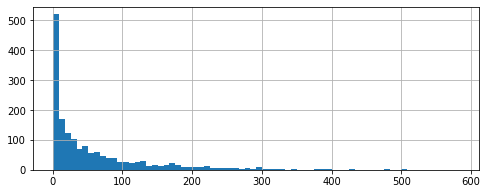

In [10]:
#We can see from the below figure that most of the movies have few number of ratings.
plt.figure(figsize=(8,3))
ratings['number_ratings'].hist(bins=70)

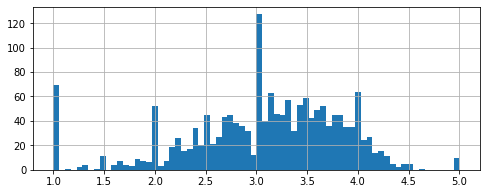

In [11]:
# This histogram shows the distribution of rating 
plt.figure(figsize=(8,3))
ratings['rating'].hist(bins=70)

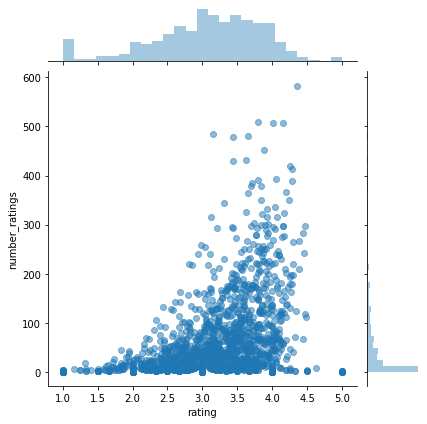

In [12]:
# More rating highest number of rating
sns.jointplot(x='rating',y='number_ratings',data=ratings,alpha=0.5)
plt.show()

# Find Similar Movies

In [13]:
movie_matrix = df.pivot_table(index='user_id',columns='title',values='rating')

In [14]:
movie_matrix.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN


In [15]:
def find_similar_movies(movie_name):
    #Select user ratings for two movies 
    movie_user_ratings = movie_matrix[movie_name]

    # Find correlations between series with corrwith (instead of corr)
    similar_to_movie = movie_matrix.corrwith(movie_user_ratings)

    # Removing NaN values and using a DataFrame instead of a series 
    corr_movies = pd.DataFrame(similar_to_movie,columns=['Correlation'])
    corr_movies.dropna(inplace=True)

    corr_movies = corr_movies.join(ratings['number_ratings'])

    result = corr_movies[corr_movies['number_ratings']>100].sort_values('Correlation',ascending=False).head()
    return result

In [16]:
find_similar_movies('Die Hard (1988)')

/Users/yas/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/Users/yas/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,Correlation,number_ratings
title,,
Die Hard (1988),1.000000,243
Die Hard: With a Vengeance (1995),0.577216,151
Die Hard 2 (1990),0.510473,166
Absolute Power (1997),0.477706,127
Nikita (La Femme Nikita) (1990),0.444070,127


# Recommendation Engine - collaborative filtering model from scratch

In [17]:
n_users = df.user_id.unique().shape[0]
n_items = df.item_id.unique().shape[0]
n_users,n_items

(943, 1682)

In [18]:
# create a user-item matrix which can be used to calculate the similarity between users and items

data_matrix = np.zeros((n_users, n_items))
for line in df.itertuples():
    data_matrix[line[1]-1, line[2]-1] = line[3]
    
train_data_matrix = np.zeros((n_users, n_items))
# unpack the Pandas object
for line in train.itertuples():
    # adjust to count rows and cols from 0 and fill in the matrix
    train_data_matrix[line[1]-1, line[2]-1] = line[3]

test_data_matrix = np.zeros((n_users, n_items))
for line in test.itertuples():
    test_data_matrix[line[1]-1, line[2]-1] = line[3]

In [19]:
# calculating the similarity by using the pairwise_distance from sklearn to calculate the cosine similarity
from sklearn.metrics.pairwise import pairwise_distances 

# user-user similarity
user_similarity = pairwise_distances(train_data_matrix, metric='cosine')

# item-item similarity
item_similarity = pairwise_distances(train_data_matrix.T, metric='cosine')

user_similarity.shape , item_similarity.shape

((943, 943), (1682, 1682))

we can make a prediction by applying the following formula for user-based CF.


1) We can look at the similarity between users k and a as weights that are

2)  multiplied by the ratings of a similar user a (corrected for the average rating of that user)

3) We need to normalize it so that the ratings stay between 1 and 5

4) As a final step, sum the average ratings for the user that you are trying to predict.

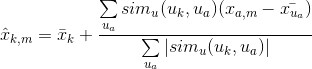

In [20]:
Image('user-based.gif',width=300, height=200)

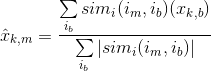

In [21]:
# Also, we can make a prediction by applying the following formula for item-based CF.

Image('item-based.gif',width=200, height=200)

In [22]:
#make predictions based on these similarities

def predict(ratings, similarity, type='user'):
    if type == 'user':
        mean_user_rating = ratings.mean(axis=1)
        #We use np.newaxis so that mean_user_rating has same format as ratings
        ratings_diff = (ratings - mean_user_rating[:, np.newaxis])
        pred = mean_user_rating[:, np.newaxis] + similarity.dot(ratings_diff) / np.array([np.abs(similarity).sum(axis=1)]).T
    elif type == 'item':
        pred = ratings.dot(similarity) / np.array([np.abs(similarity).sum(axis=1)])
    return pred

In [23]:
user_prediction = predict(data_matrix, user_similarity, type='user')
item_prediction = predict(data_matrix, item_similarity, type='item')

user_prediction.shape,item_prediction.shape

((943, 1682), (943, 1682))

In [24]:
user_prediction

array([[ 2.07233894,  0.73508831,  0.62976523, ...,  0.39358063,
         0.39308225,  0.39282239],
       [ 1.75814715,  0.37872243,  0.19541227, ..., -0.08601363,
        -0.08450729, -0.08423076],
       [ 1.77319361,  0.32209839,  0.15679534, ..., -0.13365066,
        -0.13186468, -0.13165804],
       ...,
       [ 1.62503864,  0.27392032,  0.10978165, ..., -0.16719493,
        -0.16614164, -0.16620599],
       [ 1.80936003,  0.40327059,  0.27325164, ..., -0.00867894,
        -0.00798554, -0.00760617],
       [ 1.84805953,  0.48251496,  0.38574251, ...,  0.14611928,
         0.14564701,  0.14579449]])

## Evaluation

In [25]:
from sklearn.metrics import mean_squared_error
from math import sqrt

def rmse(prediction, ground_truth):
    prediction = prediction[ground_truth.nonzero()].flatten()
    ground_truth = ground_truth[ground_truth.nonzero()].flatten()
    return sqrt(mean_squared_error(prediction, ground_truth))

print('User-based CF RMSE: ' + str(rmse(user_prediction, test_data_matrix)))
print('Item-based CF RMSE: ' + str(rmse(item_prediction, test_data_matrix)))

User-based CF RMSE: 3.105678174637224
Item-based CF RMSE: 3.588904192097963


## Model-based collaborative filtering

$$X = USV^{T}$$



In [26]:
sparsity = round(1.0-len(df)/float(n_users*n_items), 3)
print('The sparsity level of MovieLens100K is ' + str(sparsity*100) + '%')


import scipy.sparse as sp
from scipy.sparse.linalg import svds

#get SVD components from train matrix. Choose k.
u, s, vt = svds(train_data_matrix, k=20)
s_diag_matrix=np.diag(s)
X_pred = np.dot(np.dot(u, s_diag_matrix), vt)
print('User-based CF MSE: ' + str(rmse(X_pred, test_data_matrix)))

The sparsity level of MovieLens100K is 93.7%
User-based CF MSE: 2.8258075694458307


# Fast AI

In [48]:
df.head()

,user_id,item_id,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


In [27]:
# import collaborative filtering package
from fastai.collab import *

In [49]:
# Turn the title columns in category codes(to replace them with their codes for an Embedding layer)
# size of our validation set = 0.1
# we can add rating_name and user_name too.

data = CollabDataBunch.from_df(df, seed=42, valid_pct=0.1, 
                                      user_name='user_id', item_name='title', rating_name='rating')

In [50]:
#show a random batch of our data
data.show_batch()

user_id,title,target
385,"Contempt (Mépris, Le) (1963)",5.0
385,Farinelli: il castrato (1994),2.0
151,Philadelphia (1993),5.0
716,Platoon (1986),3.0
308,Brazil (1985),5.0


In [51]:
#getting the max and min values of our ratings
df.rating.min(), df.rating.max()

(1, 5)

## EmbeddingDotBias

In [31]:
# creat Learner object (our model)
# n_factors represents the size of the embedding vectors

#EmbeddingDotBias
learn = collab_learner(data, n_factors=40, y_range=(1,5), wd=1e-1)


#EmbeddingNN Model
#learn = collab_learner(data, n_factors=40, y_range=(1,5), use_nn=True, layers=[256, 128])

In [32]:
print(learn.model)

EmbeddingDotBias(
  (u_weight): Embedding(944, 40)
  (i_weight): Embedding(1654, 40)
  (u_bias): Embedding(944, 1)
  (i_bias): Embedding(1654, 1)
)


epoch,train_loss,valid_loss,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


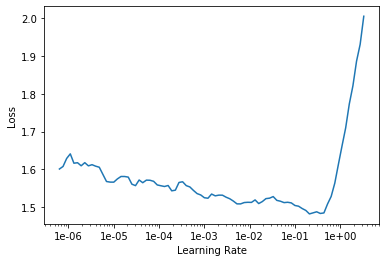

In [33]:
# find the perfect learning rates we can use the lr_find 
learn.lr_find()
# plot learning rate graph
learn.recorder.plot()

In [34]:
# Train our model using the fit_one_cycle method
learn.fit_one_cycle(4, 1e-02)

epoch,train_loss,valid_loss,time
0,0.919684,0.943335,00:11
1,0.866919,0.873657,00:11
2,0.731324,0.827987,00:10
3,0.592298,0.821060,00:11


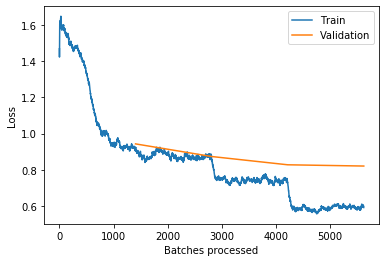

In [35]:
learn.recorder.plot_losses()

In [36]:
learn.save('movie-dot-1')

In [53]:
df.head()

,user_id,item_id,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


In [58]:
learn = learn.load('movie-dot-1')

In [63]:
preds, y = learn.get_preds(ds_type=DatasetType.Valid)

In [74]:
preds

tensor([3.6638, 3.3351, 4.0537,  ..., 3.9147, 2.6864, 3.9615])

In [83]:
y, y.shape

(tensor([3., 5., 4.,  ..., 4., 3., 4.]), torch.Size([10000]))

In [76]:
print('Fastai CF MSE: ' + str(rmse(preds, y)))

Fastai CF MSE: tensor(0.9061)


### Recommend movie for a user method 1

In [99]:
rows = []
movies = list(df.drop_duplicates(subset='item_id', keep='first').item_id)
names = list(df.drop_duplicates(subset='item_id', keep='first').title)

for i in range(len(movies)):
    rows.append( dict({'name': names[i], 'item_id' : movies[i], 'user_id' : 9}))
test_data = pd.DataFrame(rows)

In [98]:
for idx, (score, name) in enumerate(sorted(zip(preds, names), reverse=True)):
    if idx >= 10:
        break
    print("Score: ", round(float(score), 2), " for movie: ", name)

Score:  4.87  for movie:  Home Alone (1990)
Score:  4.81  for movie:  Beauty and the Beast (1991)
Score:  4.8  for movie:  Boys on the Side (1995)
Score:  4.77  for movie:  Hamlet (1996)
Score:  4.75  for movie:  Denise Calls Up (1995)
Score:  4.72  for movie:  Tigrero: A Film That Was Never Made (1994)
Score:  4.71  for movie:  Nénette et Boni (1996)
Score:  4.71  for movie:  Career Girls (1997)
Score:  4.69  for movie:  French Kiss (1995)
Score:  4.68  for movie:  Giant (1956)


### Recommend movie for a user method 2

In [100]:
df.iloc[250]

user_id                            16
item_id                           302
rating                              5
timestamp                   877716993
title        L.A. Confidential (1997)
Name: 250, dtype: object

In [101]:
learn.predict(df.iloc[250])

(FloatItem 4.758829, tensor(4.7588), tensor(4.7588))

In [102]:
learn.get_preds(ds_type=DatasetType.Valid)

[tensor([3.6638, 3.3351, 4.0537,  ..., 3.9147, 2.6864, 3.9615]),
 tensor([3., 5., 4.,  ..., 4., 3., 4.])]

In [103]:
# gives us movie title and movie_id
Mapping_file= dict(zip(df.title.tolist(),df.item_id.tolist()))

In [104]:
def pred_user_rating(ui):
    if ui in df.user_id.unique():
        ui_list = df[df.user_id == ui].item_id.tolist()
        d = {k: v for k,v in Mapping_file.items() if not v in ui_list}
        
        predictedL = []
        for i, j in d.items():     
            predicted = learn.predict(df.iloc[ui])
            predictedL.append((i, predicted[0])) 
        pdf = pd.DataFrame(predictedL, columns = ['movies', 'ratings'])
        pdf.set_index('movies', inplace=True)    
        return pdf.head(10)        
    else:
        print("User Id does not exist in the list!")
        return None

In [105]:
# Recommended movie for user 9
user_id = 9
pred = pred_user_rating(user_id)
pred

,ratings
movies,
L.A. Confidential (1997),3.6986756
Heavyweights (1994),3.6986756
Legends of the Fall (1994),3.6986756
Jackie Brown (1997),3.6986756
Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1963),3.6986756
"Hunt for Red October, The (1990)",3.6986756
"Jungle Book, The (1994)",3.6986756
Grease (1978),3.6986756
"Remains of the Day, The (1993)",3.6986756


In [106]:
# Actual movies that user 9 has watched
df[df['user_id']==9]

,user_id,item_id,rating,timestamp,title
51,9,242,4,886958715,Kolya (1996)
6669,9,201,5,886960055,Evil Dead II (1987)
11580,9,690,1,886959344,Seven Years in Tibet (1997)
15237,9,294,4,886959453,Liar Liar (1997)
19278,9,385,5,886960055,True Lies (1994)
20567,9,479,4,886959343,Vertigo (1958)
24305,9,298,5,886960055,Face/Off (1997)
27423,9,483,5,886960056,Casablanca (1942)
32680,9,7,4,886960030,Twelve Monkeys (1995)
34547,9,507,4,886959343,"Streetcar Named Desire, A (1951)"


In [96]:
def evaluate(user_id):
    user_number = df[df['user_id']==user_id]
    t = 0
    for i in range(len(user_number)):
        if user_number['title'].iloc[i] in pred.index:
            t+=1
    print(t)

In [92]:
evaluate(9)   

0


# Sources
https://course.fast.ai/videos/?lesson=4

https://towardsdatascience.com/collaborative-filtering-with-fastai-3dbdd4ef4f00

https://github.com/TannerGilbert/Tutorials/blob/master/FastAI/Book%20Recommendation%20System.ipynb

https://medium.com/quantyca/deep-learning-for-collaborative-filtering-using-fastai-b28e197ccd59

https://www.kaggle.com/abhikjha/movielens-fastai-collab

https://blog.cambridgespark.com/nowadays-recommender-systems-are-used-to-personalize-your-experience-on-the-web-telling-you-what-120f39b89c3c